In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import pandas as pd

In [3]:
from sklearn.datasets import load_diabetes

In [4]:
data=load_diabetes()

In [5]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
X=data.data
y=data.target

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [9]:
L.fit(X_train,y_train)

LinearRegression()

In [10]:
print(L.coef_)

[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]


In [11]:
print(L.intercept_)

151.34560453985995


In [12]:
y_pred=L.predict(X_test)

In [13]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.4526027629719195
2900.1936284934814


In [14]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.1)


In [15]:
R.fit(X_train,y_train)

Ridge(alpha=0.1)

In [16]:
print(R.coef_)
print(R.intercept_)

[  42.85566976 -205.49431899  505.08903304  317.0932049  -108.50026183
  -86.23673333 -190.36318008  151.70708637  392.28931896   79.9081772 ]
151.4585745667961


In [17]:
y_pred1=R.predict(X_test)

In [18]:
print(r2_score(y_test,y_pred1))
print(mean_squared_error(y_test,y_pred1))


0.46085219464119254
2856.486887670654


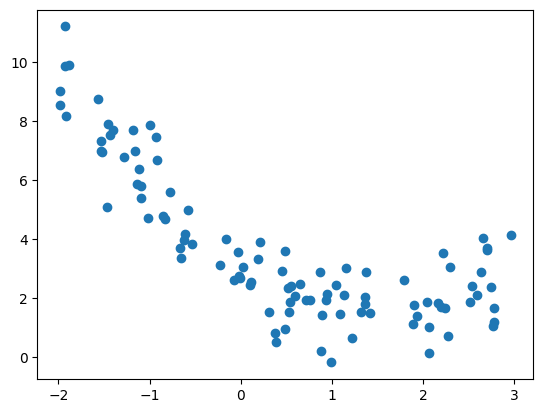

In [20]:
m=100
x1=5*np.random.rand(m,1)-2
x2=0.7*x1**2 -2 *x1 +3 + np.random.randn(m,1)
plt.scatter(x1,x2)
plt.show()

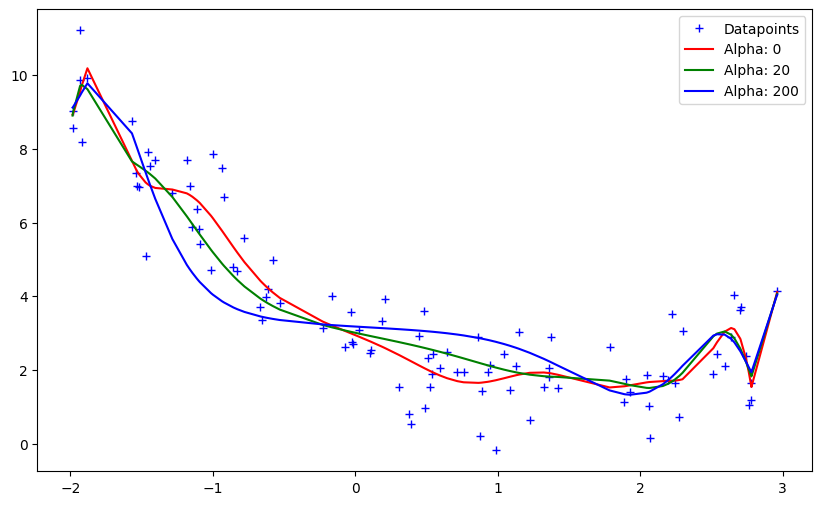

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()